## Aula 5 - Elaboração de Gráficos

### Gráficos com Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib

#### Dataset tips

In [2]:
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
# Considere dataset de gorgetas a seguir
tips = sns.load_dataset("tips") 
# Mostre as primeiras linhas do dataframe tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


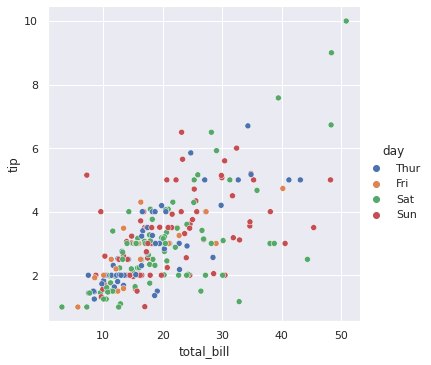

In [3]:
# Criar um scatter plot com o dado da gorgeta (tip) no eixo y, o total da conta (total_bill) no eixo x
#    e o dia da semana (day) representado em cores diferentes no gráfico. Para definir as cores use o parâmetro
#    hue.
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)


#### Dataset frmi

In [4]:
# Considere o seguinte dataframe
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


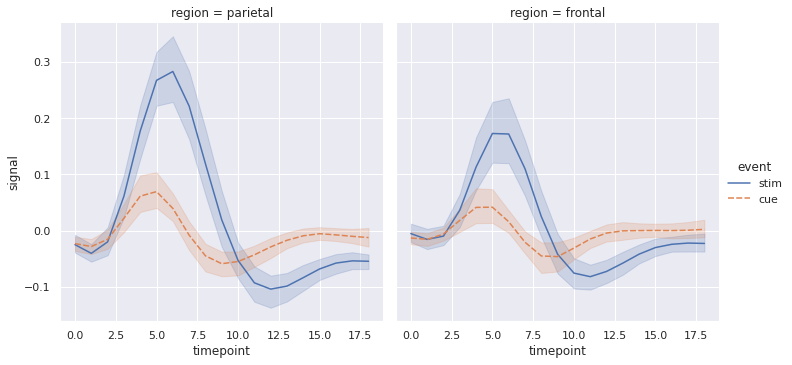

In [5]:
# Crie um gráfico de linhas especificando no eixo x a variável timepoint, no eixo y a variável signal,
#   na separação em gráficos distintos (argumento col) utilize a variável region, nas cores e estilo utilize a 
#   variável event.
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

#### Biblioteca Datetime do Python

In [6]:
from datetime import datetime # Esta biblioteca python realiza diversas operações com datas
# Crie um objeto datetime a partir da data '18/09/19 01:55:19' usando o método strptime
datetime.strptime('18/09/19 01:55:19', '%d/%m/%y %H:%M:%S')

datetime.datetime(2019, 9, 18, 1, 55, 19)

In [7]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [8]:
# Crie novamente o mesmo objeto datetime criado acima, desta vez guardando-o numa variavel d
d = datetime.strptime('18/09/19 01:55:19', '%d/%m/%y %H:%M:%S')
# Converta o datetime guardado em d para um string ANO-MÊS-DIA
d.strftime('%d-%B-%Y')

'18-setembro-2019'

In [9]:
# Imprima o ano armazenado na variável datetime d
print(d.year)
# Imprima o mês armazenado na variável datetime d
print(d.month)

2019
9


#### Dataset Curetagem (pós aborto)

In [10]:
# Considere o seguinte dataframe
path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df_curetagem = pd.read_excel(path_curetagem, na_values='-')
df_curetagem.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df_curetagem['Total']
df_curetagem.head()

,uf,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun
0,35 São Paulo,2153,2800.0,2892,3000,3201,3008,3412,3395,3623,...,2852,2968,2946,2756,2771,2520,2595,2476,2559,2365.0
1,29 Bahia,1156,1640.0,1560,1722,1530,2089,1831,2267,2403,...,1533,1505,1545,1418,1462,1192,1375,1363,1260,1245.0
2,31 Minas Gerais,1193,1499.0,1601,1398,1534,1787,1639,1730,1751,...,1221,1459,1333,1359,1260,1235,1413,1196,1158,1086.0
3,33 Rio de Janeiro,679,816.0,1134,1072,1254,1243,1326,1475,1270,...,1308,1350,1217,1085,1049,930,919,946,920,910.0
4,26 Pernambuco,489,904.0,796,1142,903,877,886,1003,1008,...,796,795,778,831,738,647,749,693,716,666.0


In [11]:
# Crie um dataframe despivotado usando o método melt. Use os seguintes parâmetros id_vars=['uf'], 
#     var_name='data', value_name='qtd'
df_unpivoted = df_curetagem.melt(id_vars=['uf'], var_name='data', value_name='qtd')
df_unpivoted.head(50)

,uf,data,qtd
0,35 São Paulo,2008/Jan,2153.0
1,29 Bahia,2008/Jan,1156.0
2,31 Minas Gerais,2008/Jan,1193.0
3,33 Rio de Janeiro,2008/Jan,679.0
4,26 Pernambuco,2008/Jan,489.0
5,23 Ceará,2008/Jan,731.0
6,41 Paraná,2008/Jan,599.0
7,15 Pará,2008/Jan,600.0
8,43 Rio Grande do Sul,2008/Jan,349.0
9,21 Maranhão,2008/Jan,434.0


In [12]:
from datetime import datetime
import locale
# Configure o locale para 'pt_BR.UTF-8'
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do mês (de 1 a 12)
df_unpivoted['mes'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').month)
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do ano
df_unpivoted['ano'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').year)
# Crie uma coluna no dataframe df_unpivoted para guardar a data (em formato datetime)
df_unpivoted['data'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
# Converta a coluna qtd para float
df_unpivoted['qtd'] = df_unpivoted['qtd'].astype(float)

In [13]:

df_2018_2017 = df_unpivoted[(df_unpivoted['ano']==2018) | (df_unpivoted['ano']==2017)]

In [14]:
df_unpivoted.head()

,uf,data,qtd,mes,ano
0,35 São Paulo,2008-01-01,2153.0,1,2008
1,29 Bahia,2008-01-01,1156.0,1,2008
2,31 Minas Gerais,2008-01-01,1193.0,1,2008
3,33 Rio de Janeiro,2008-01-01,679.0,1,2008
4,26 Pernambuco,2008-01-01,489.0,1,2008


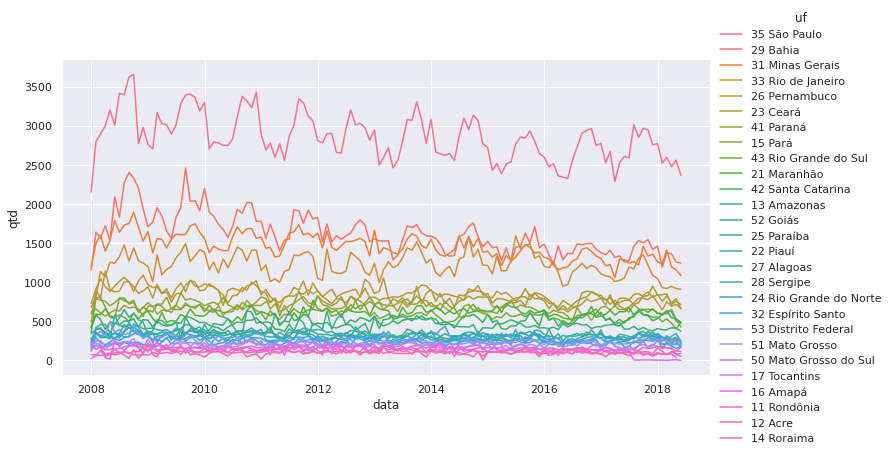

In [15]:
# Plote um gráfico de linha com a data no eixo x, a variavel qtd no eixo y e desagregando o dado pelas as UFs 
# e representando-as por cores distintas. Use um aspect=2 para deixar o gráfico mais alongado horizontalmente.
sns.relplot(x="data", y="qtd", hue="uf", aspect=2,
            kind="line", data=df_unpivoted);
# Pergunta: esse gráfico é periódico?

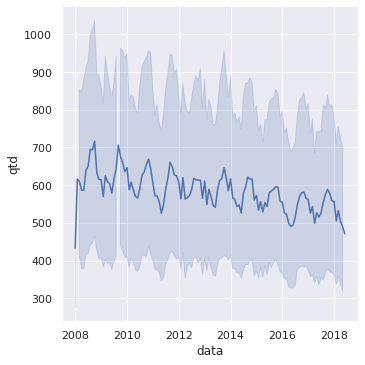

In [18]:
# Plote o mesmo gráfico de linha da célula acima, mas agora sem a desagregação por UF.
sns.relplot(x="data", y="qtd",
            kind="line", data=df_unpivoted);

#### Gráfico de Violino (Violin plot)

In [ ]:
# Considere o seguinte método que traça 3 gráfciso: um histograma, um boxplot e um gráfico de violino
# Fonte: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d
def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()

sample_gaussian = np.random.normal(size=1000)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

In [ ]:
# Crie um gráfico de violino do dataset de gorjetas (tips) colocando na viariável x o dia da semana (day),
#     no eixo y o total da conta (total_bill), desagregue por fumante (smoker) representando a desagregação por
#     cores distintas. Use o argumento split=True para colocar num mesmo violino os dados referentes às duas
#     categorias de smoker (Yes e No).
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

#### Gráfico de Barras

In [ ]:
# Crie um gráfico categórico colocando no eixo x o dia da semana (day), no eixo y a média de total_bill,
#      e a desagregação por cor da variável smoker.
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips);

#### pairplot (pares de gráficos)

In [ ]:
# Considere o dataframe a seguir carregado a partir do dataset iris
iris = sns.load_dataset("iris")
# Plote um conjunto de gráficos de scatter plot de todas as combinações de todas as variáveis do dataframe,
#     desagregando em cores as diferentes espécies. Esse tipo de gráfico no Seaborn é conhecido por pairplot.
sns.pairplot(data=iris, hue="species");

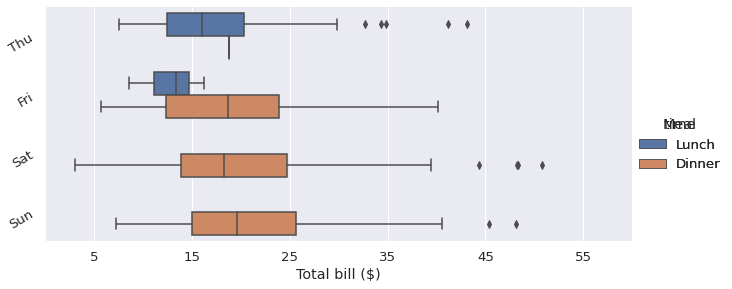

In [10]:
# Altere a escala da fonte para 1.2 usando o método sns.set()
sns.set(font_scale=1.2)
# Crie um gráfico de caixas (boxplot) retornando para uma variável g. Use no eixo x o total_bill, em y o dia da
#      semana, desagregue pelo tipo de refeição (time) com cores diferentes. Ajuste a autura para 4, 
#      o aspect para 2.
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=4, aspect=2,
                kind="box", data=tips);

# Altere a legenda do gráfico para Meal
g.add_legend(title="Meal")
# Altere o label do eixo x para "Total bill ($)"
g.set_axis_labels("Total bill ($)", "")
# Altere os valores dos ticks no eixo y para ["Thu", "Fri", "Sat", "Sun"]. E ajuste os limites inferior e 
#      superior do eixo x para o seguinte intervalo xlim=(0, 60)
g.set(xlim=(0, 60), yticklabels=["Thu", "Fri", "Sat", "Sun"])
# Ajuste os ticks no eixo x para [5, 15, 25, 35, 45, 55]
g.ax.set_xticks([5, 15, 25, 35, 45, 55]);
# Rotacione em 30 graus a orientação das legendas do eixo y.
plt.setp(g.ax.get_yticklabels(), rotation=30);